# Introduction

I downloaded a dataset of apple quality on kaggle : https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality

The goal is to predict if an apple is good or bad

# Import libraries

In [4]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt

C:\Users\anton\AppData\Local\Temp\ipykernel_19352\1991857245.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
apple = pd.read_csv(os.path.join("apple_quality", "apple_quality.csv"))

In [6]:
apple.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [ ]:
apple.info()

Here I can see that the acidity is also an object whereas it's composed of numerical values

In [7]:
apple["Acidity"].value_counts()

Acidity
-0.491590483                         1
0.416518576                          1
1.223084441                          1
2.190636353                          1
5.125138503                          1
                                    ..
-0.08899782                          1
-0.3815496                           1
4.67363368                           1
-0.76858734                          1
Created_by_Nidula_Elgiriyewithana    1
Name: count, Length: 4001, dtype: int64

In [ ]:
apple.describe()

In [ ]:
apple.hist(bins = 50, figsize=(15,15))

In [8]:
missing_values = apple.isnull().sum()
print(missing_values)

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64


In [9]:
# I delete the only value that contains null
apple_cleaned = apple.dropna()

# So now only one line has been deleted
print("Number of line :", len(apple_cleaned))

Number of line : 4000


In [10]:
apple_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 312.5+ KB


In [6]:
apple_cleaned["Acidity"]

0       -0.491590483
1       -0.722809367
2        2.621636473
3        0.790723217
4        0.501984036
            ...     
3995     0.137784369
3996     1.854235285
3997    -1.334611391
3998    -2.229719806
3999     1.599796456
Name: Acidity, Length: 4000, dtype: object

In [7]:
# I convert the acidity
apple_cleaned['Acidity'] = pd.to_numeric(apple['Acidity'], errors='coerce')

C:\Users\anton\AppData\Local\Temp\ipykernel_13692\3936742188.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_cleaned['Acidity'] = pd.to_numeric(apple['Acidity'], errors='coerce')


In [8]:
apple_cleaned.info() #Now acidities are float64

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(8), object(1)
memory usage: 312.5+ KB


In [11]:
apple_cleaned["Quality"]

0       good
1       good
2        bad
3       good
4       good
        ... 
3995     bad
3996    good
3997     bad
3998    good
3999    good
Name: Quality, Length: 4000, dtype: object

# Test and train set

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(apple_cleaned, apple_cleaned["Quality"]):
    train_set = apple_cleaned.loc[train_index]
    test_set = apple_cleaned.loc[test_index]

In [ ]:
len(train_set)

In [ ]:
len(test_set)

In [ ]:
test_set["Quality"].value_counts() / len(test_set)

In [ ]:
train_set["Quality"].value_counts() / len(train_set)

In [ ]:
apple_cleaned["Quality"].value_counts() / len(apple_cleaned)

The repartition is good

In [13]:
def income_cat_proportions(data):
    return data["Quality"].value_counts() / len(data)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(apple_cleaned),
    "Stratified": income_cat_proportions(train_set),
    "Random": income_cat_proportions(train_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [14]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
Quality,,,,,
bad,0.499,0.499063,0.499063,0.012525,0.012525
good,0.501,0.500938,0.500938,-0.012475,-0.012475


# Let's discover our datas !!

In [15]:
apple_train = train_set.copy()

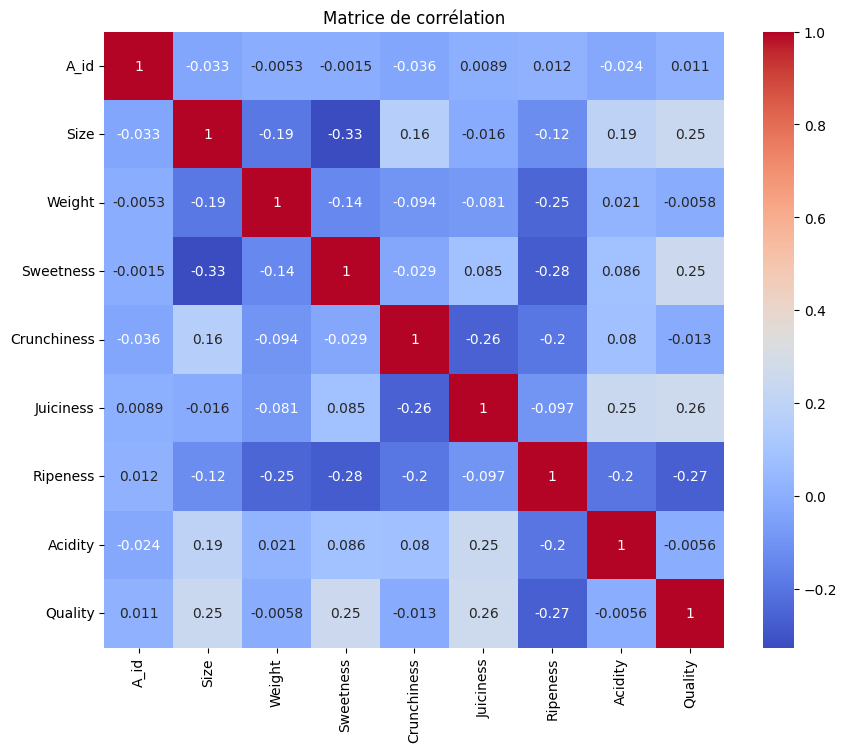

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer un dictionnaire de mapping
quality_mapping = {'good': 1, 'bad': 0}

# Appliquer le mapping à la colonne Quality
apple_train['Quality'] = apple_train['Quality'].map(quality_mapping)

# Maintenant, vous pouvez calculer la matrice de corrélation
correlation_matrix = apple_train.corr()

# Tracer la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()



In [17]:
correlation_matrix["Quality"].sort_values(ascending = False)

Quality        1.000000
Juiciness      0.261178
Sweetness      0.252653
Size           0.247533
A_id           0.011098
Acidity       -0.005602
Weight        -0.005757
Crunchiness   -0.013162
Ripeness      -0.266937
Name: Quality, dtype: float64

So here we can see which features can help us to predict the quality of an apple. We could have guessed it but the juice, the sweetness, the size and the ripeness are correlated. In my mind, acidity and crunchiness would have played a bigger role.

array([[<Axes: xlabel='Quality', ylabel='Quality'>,
        <Axes: xlabel='Juiciness', ylabel='Quality'>,
        <Axes: xlabel='Sweetness', ylabel='Quality'>,
        <Axes: xlabel='Size', ylabel='Quality'>,
        <Axes: xlabel='Ripeness', ylabel='Quality'>],
       [<Axes: xlabel='Quality', ylabel='Juiciness'>,
        <Axes: xlabel='Juiciness', ylabel='Juiciness'>,
        <Axes: xlabel='Sweetness', ylabel='Juiciness'>,
        <Axes: xlabel='Size', ylabel='Juiciness'>,
        <Axes: xlabel='Ripeness', ylabel='Juiciness'>],
       [<Axes: xlabel='Quality', ylabel='Sweetness'>,
        <Axes: xlabel='Juiciness', ylabel='Sweetness'>,
        <Axes: xlabel='Sweetness', ylabel='Sweetness'>,
        <Axes: xlabel='Size', ylabel='Sweetness'>,
        <Axes: xlabel='Ripeness', ylabel='Sweetness'>],
       [<Axes: xlabel='Quality', ylabel='Size'>,
        <Axes: xlabel='Juiciness', ylabel='Size'>,
        <Axes: xlabel='Sweetness', ylabel='Size'>,
        <Axes: xlabel='Size', ylabel='Si

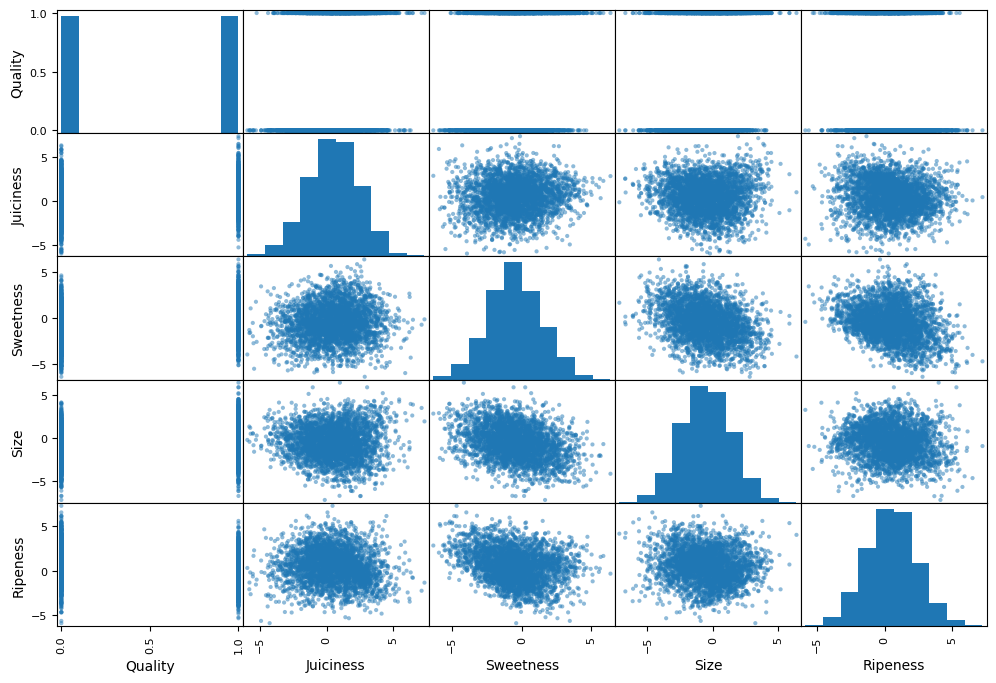

In [18]:
from pandas.plotting import scatter_matrix

attributes = ["Quality", "Juiciness", "Sweetness",
              "Size", "Ripeness" ]
scatter_matrix(apple_train[attributes], figsize=(12, 8))

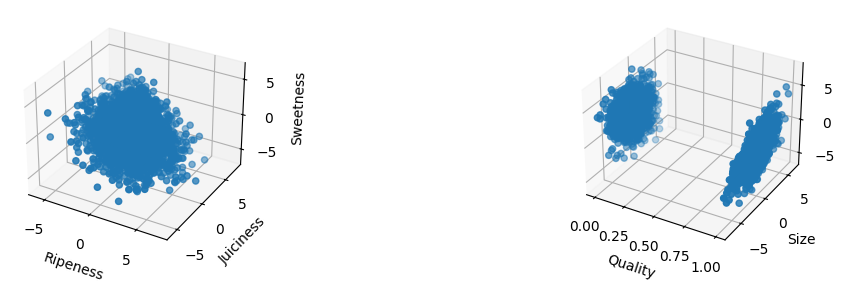

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Création de la figure
fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Liste des combinaisons de variables
combinations = [("Ripeness", "Juiciness", "Sweetness"),
                ("Quality", "Size", "Ripeness")]

# Boucle sur les combinaisons pour créer les graphiques 3D
for i, combo in enumerate(combinations, start=1):
    ax = fig.add_subplot(2, 2, i, projection='3d')
    ax.scatter(apple_train[combo[0]], apple_train[combo[1]], apple_train[combo[2]])
    ax.set_xlabel(combo[0])
    ax.set_ylabel(combo[1])
    ax.set_zlabel(combo[2])

plt.show()


# Test attribute combinations

In [ ]:
apple_train["Ratio Juice Sweet"] = apple_train["Juiciness"]/apple_train["Sweetness"]
apple_train["Ratio Juice size"] = apple_train["Juiciness"]/apple_train["Size"]
apple_train["Ratio Juice Ripeness"] = apple_train["Juiciness"]/apple_train["Ripeness"]
apple_train["Ratio Sweet Size"] = apple_train["Sweetness"]/apple_train["Size"]

apple_train["Ratio Sweet Ripeness"] = apple_train["Sweetness"]/apple_train["Ripeness"]

apple_train["Ratio Size Ripeness"] = apple_train["Size"]/apple_train["Ripeness"]

In [ ]:
corr_matrix = apple_train.corr()
corr_matrix["Quality"].sort_values(ascending=False)

No need to create attributes

In [ ]:
# Let's delete them
attributes_to_delete = ["Ratio Juice Sweet", "Ratio Juice size", "Ratio Juice Ripeness",
                         "Ratio Sweet Size", "Ratio Sweet Ripeness", "Ratio Size Ripeness"]

apple_train.drop(attributes_to_delete, axis=1, inplace=True)


# Prepare the data for machine learning

In [20]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

apple = apple_train.drop("Quality", axis=1) #Drop the label
apple_label = apple_train["Quality"].copy() #Save the label

No need to clean the data as it's from kaggle, I've already removed one apple that had missing attributes

In [21]:
sample_incomplete_rows = apple[apple.isnull().any(axis=1)].head()
sample_incomplete_rows

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity


Cool !

In [22]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3200 entries, 337 to 2040
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         3200 non-null   float64
 1   Size         3200 non-null   float64
 2   Weight       3200 non-null   float64
 3   Sweetness    3200 non-null   float64
 4   Crunchiness  3200 non-null   float64
 5   Juiciness    3200 non-null   float64
 6   Ripeness     3200 non-null   float64
 7   Acidity      3200 non-null   object 
dtypes: float64(7), object(1)
memory usage: 225.0+ KB


In [3]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

numeric_features = apple.select_dtypes(include=['float64']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

apple_prepared = preprocessor.fit_transform(apple)

NameError: name 'apple' is not defined

In [ ]:
transformed_numeric_feature_names = numeric_features
print(transformed_numeric_feature_names)


In [18]:
apple_prepared #So now apple_prepared is matrices !

array([[0.08427107, 0.45287933, 0.71853058, ..., 0.55328668, 0.05074904,
        0.66691376],
       [0.27406852, 0.45883602, 0.4406054 , ..., 0.3291736 , 0.46743578,
        0.40074663],
       [0.44986247, 0.40782907, 0.71512384, ..., 0.58500763, 0.3444819 ,
        0.67281939],
       ...,
       [0.80995249, 0.53552699, 0.5367685 , ..., 0.16997668, 0.53218183,
        0.29338052],
       [0.14328582, 0.78598533, 0.08914326, ..., 0.59058256, 0.59341422,
        0.65462016],
       [0.51012753, 0.48917882, 0.33724823, ..., 0.60655744, 0.29660554,
        0.47855096]])

In [19]:
apple_prepared.shape #And the shape is what it should so let's train

(3200, 8)

Good !

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Test of several models
classifiers = {
    'Logistic Regression' : LogisticRegression(penalty='l2', solver='lbfgs', C=1.0, max_iter=1000),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier()
}

# I'll do cross validation
for name, clf in classifiers.items():
    scores = cross_val_score(clf, apple, apple_label, cv=5, scoring='accuracy')
    precision_scores = cross_val_score(clf, apple, apple_label, cv=5, scoring='precision')
    recall_scores = cross_val_score(clf, apple, apple_label, cv=5, scoring='recall')
    f1_scores = cross_val_score(clf, apple, apple_label, cv=5, scoring='f1')
    
    print(f"{name}: Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")
    print(f"   Precision: {precision_scores.mean():.4f} (+/- {precision_scores.std():.4f})")
    print(f"   Recall: {recall_scores.mean():.4f} (+/- {recall_scores.std():.4f})")
    print(f"   F1-score: {f1_scores.mean():.4f} (+/- {f1_scores.std():.4f})")

I'm going to chose CatBoost and Random Forest to fit the model and then I'll be able to see which one is really the best

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Let's search parameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

grid_search.fit(apple, apple_label)

print("Best params : ", grid_search.best_params_)

best_rf = grid_search.best_estimator_


In [ ]:
clf = best_rf
scores = cross_val_score(clf, apple, apple_label, cv=5, scoring='accuracy')
precision_scores = cross_val_score(clf, apple, apple_label, cv=5, scoring='precision')
recall_scores = cross_val_score(clf, apple, apple_label, cv=5, scoring='recall')
f1_scores = cross_val_score(clf, apple, apple_label, cv=5, scoring='f1')

print(f"Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")
print(f"Precision: {precision_scores.mean():.4f} (+/- {precision_scores.std():.4f})")
print(f"Recall: {recall_scores.mean():.4f} (+/- {recall_scores.std():.4f})")
print(f"F1-score: {f1_scores.mean():.4f} (+/- {f1_scores.std():.4f})")


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 1000),                
    'max_depth': [None] + list(range(1, 51, 5)),        
    'min_samples_split': randint(2, 20),                
    'min_samples_leaf': randint(1, 20)                 
}

rf = RandomForestClassifier()

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', verbose=2, n_jobs=-1, random_state=42)

random_search.fit(apple, apple_label)

print("Meilleurs hyperparamètres : ", random_search.best_params_)

best_rf = random_search.best_estimator_


In [ ]:
clf = best_rf
scores = cross_val_score(clf, apple, apple_label, cv=5, scoring='accuracy')
precision_scores = cross_val_score(clf, apple, apple_label, cv=5, scoring='precision')
recall_scores = cross_val_score(clf, apple, apple_label, cv=5, scoring='recall')
f1_scores = cross_val_score(clf, apple, apple_label, cv=5, scoring='f1')

print(f"Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")
print(f"Precision: {precision_scores.mean():.4f} (+/- {precision_scores.std():.4f})")
print(f"Recall: {recall_scores.mean():.4f} (+/- {recall_scores.std():.4f})")
print(f"F1-score: {f1_scores.mean():.4f} (+/- {f1_scores.std():.4f})")

In [ ]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier

param_grid = {
    'iterations': [100, 200, 300],       
    'learning_rate': [0.01, 0.05, 0.1],  
    'depth': [6, 8, 10],                  
    'l2_leaf_reg': [1, 3, 5]              
}


catboost = CatBoostClassifier()

grid_search = GridSearchCV(estimator=catboost, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)

grid_search.fit(apple, apple_label)

print("Best params : ", grid_search.best_params_)

best_catboost = grid_search.best_estimator_


In [ ]:
clf = CatBoostClassifier(depth=8, iterations=300, l2_leaf_reg=5, learning_rate=0.1)
scores = cross_val_score(clf, apple, apple_label, cv=5, scoring='accuracy')
precision_scores = cross_val_score(clf, apple, apple_label, cv=5, scoring='precision')
recall_scores = cross_val_score(clf, apple, apple_label, cv=5, scoring='recall')
f1_scores = cross_val_score(clf, apple, apple_label, cv=5, scoring='f1')

print(f"Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")
print(f"Precision: {precision_scores.mean():.4f} (+/- {precision_scores.std():.4f})")
print(f"Recall: {recall_scores.mean():.4f} (+/- {recall_scores.std():.4f})")
print(f"F1-score: {f1_scores.mean():.4f} (+/- {f1_scores.std():.4f})")

I'll keep this model

In [ ]:
test_set

In [ ]:
apple_test_label

In [23]:
quality_mapping = {'good': 1, 'bad': 0}

test_set['Quality'] = test_set['Quality'].map(quality_mapping)

apple_test_label = test_set["Quality"].copy()

apple_test = test_set.drop(["Quality"], axis=1)

In [ ]:
apple_test_label

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

final_model = best_catboost

apple_test_prepared = preprocessor.fit_transform(apple_test)

final_predictions = final_model.predict(apple_test_prepared)

accuracy = accuracy_score(apple_test_label, final_predictions)
precision = precision_score(apple_test_label, final_predictions)
recall = recall_score(apple_test_label, final_predictions)
f1 = f1_score(apple_test_label, final_predictions)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Save the model

In [ ]:
import pickle

#Save model
with open('Apple_quality.pkl', 'wb') as file:
    pickle.dump(clf, file)

# Load model
with open('Apple_quality.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


# I need to put more doc

In [26]:
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
polynomial_svm_clf = Pipeline([
("poly_features", PolynomialFeatures(degree=3)),
("scaler", StandardScaler()),
("svm_clf", SVC(C=10))
])
polynomial_svm_clf.fit(apple, apple_label)

# Calculer la précision sur l'ensemble de test
accuracy = polynomial_svm_clf.score(apple, apple_label)
print("Accuracy:", accuracy)

Accuracy: 0.9475


In [27]:
from sklearn.model_selection import GridSearchCV

# Définir la grille des hyperparamètres à rechercher
param_grid = {
    'poly_features__degree': [2, 3, 4,10],  # Degré du polynôme
    'svm_clf__C': [0.1, 1, 10, 100]      # Paramètre de régularisation C
}

# Initialiser le classifieur SVM polynomial
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures()),
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel='poly'))
])

# Recherche par grille avec validation croisée
grid_search = GridSearchCV(estimator=polynomial_svm_clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Exécuter la recherche par grille sur les données d'entraînement
grid_search.fit(apple, apple_label)

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres : ", grid_search.best_params_)

# Utiliser le modèle avec les meilleurs hyperparamètres pour faire des prédictions
best_polynomial_svm_clf = grid_search.best_estimator_

# Calculer la précision sur l'ensemble de test
accuracy = best_polynomial_svm_clf.score(apple, apple_label)
print("Accuracy:", accuracy)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Utilisez le meilleur modèle trouvé par GridSearchCV
final_model = best_polynomial_svm_clf()

# Transformez les données de test avec le préprocesseur
apple_test_prepared = preprocessor.transform(apple_test)

# Faites des prédictions sur les données de test
final_predictions = final_model.predict(apple_test_prepared)

# Calculez les métriques de performance
accuracy = accuracy_score(apple_test_label, final_predictions)
precision = precision_score(apple_test_label, final_predictions)
recall = recall_score(apple_test_label, final_predictions)

# Affichez les résultats
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

In [25]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Créer le pipeline SVM
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", SVC(C=100)),
])

# Entraîner le modèle
svm_clf.fit(apple, apple_label)

# Calculer la précision sur l'ensemble de test
accuracy = svm_clf.score(apple, apple_label)
print("Accuracy:", accuracy)

Accuracy: 0.9734375


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", SVC())
])

param_grid = {
    'linear_svc__C': [0.1, 1, 10, 100],
    'linear_svc__kernel': ['linear', 'rbf'],
}

grid_search = GridSearchCV(svm_clf, param_grid, cv=5, scoring='accuracy')

grid_search.fit(apple, apple_label)

print("Meilleurs hyperparamètres :", grid_search.best_params_)
print("Meilleur score :", grid_search.best_score_)

Works more than well with a SVC

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", SVC())
])

param_grid = {
    'linear_svc__C': [0.1, 1, 10, 100],
    'linear_svc__kernel': ['linear', 'rbf'],
}

grid_search = GridSearchCV(svm_clf, param_grid, cv=5, scoring='accuracy')

grid_search.fit(apple, apple_label)

print("Meilleurs hyperparamètres :", grid_search.best_params_)
print("Meilleur score :", grid_search.best_score_)

Meilleurs hyperparamètres : {'linear_svc__C': 10, 'linear_svc__kernel': 'rbf'}
Meilleur score : 0.8956250000000001


In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Utilisez le meilleur modèle trouvé par GridSearchCV
final_model = grid_search.best_estimator_

# Transformez les données de test avec le préprocesseur
apple_test_prepared = preprocessor.transform(apple_test)

# Faites des prédictions sur les données de test
final_predictions = final_model.predict(apple_test_prepared)

# Calculez les métriques de performance
accuracy = accuracy_score(apple_test_label, final_predictions)
precision = precision_score(apple_test_label, final_predictions)
recall = recall_score(apple_test_label, final_predictions)

# Affichez les résultats
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.5000
Precision: 0.5006
Recall: 0.9975


c:\Users\anton\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Finally it's not that good ahah